In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
X = np.array([
    [1, 50],
    [1, 60],
    [1, 70],
    [1, 100]
])
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [3]:
Y = np.array([[10], [30], [40], [50]])
Y

array([[10],
       [30],
       [40],
       [50]])

### X<sup>T</sup>X

In [4]:
X_T_X = (X.T).dot(X)
X_T_X

array([[    4,   280],
       [  280, 21000]])

### (X<sup>T</sup>X)<sup>-1</sup>

In [5]:
X_T_X_inverted = inv(X_T_X)
X_T_X_inverted

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

### (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>Y

In [6]:
w = X_T_X_inverted.dot(X.T).dot(Y)
print(f"w_0={w[0][0]:.2f}, w_1={w[1][0]:.2f}")

w_0=-17.50, w_1=0.71


In [7]:
w

array([[-17.5       ],
       [  0.71428571]])

In [8]:
w = (
    inv(
        (X.T).dot(X)
    )
    .dot(X.T)
    .dot(Y)
)
w

array([[-17.5       ],
       [  0.71428571]])

### y=0.714x-17.5

In [9]:
margin = 10
X_min = X[:,1].min()-margin
X_max = X[:,1].max()+margin

X_support = np.linspace(X_min, X_max, num=100)
Y_model = w[0][0] + w[1][0]*X_support

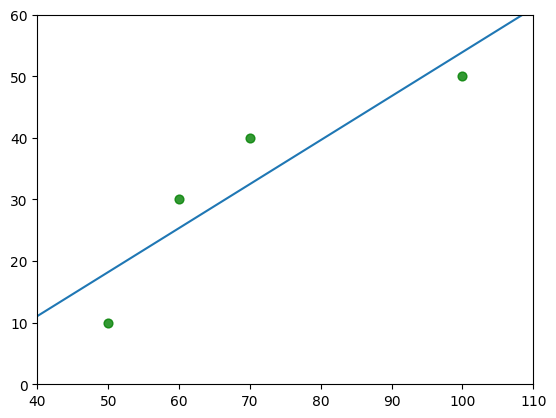

In [10]:
plt.xlim(X_min, X_max)
plt.ylim(0, Y[:,0].max() + margin)
plt.scatter(X[:,1], Y[:,0], 40, "g", "o", alpha=0.8)
plt.plot(X_support, Y_model)
plt.show()

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("boston.csv", delimiter=";")

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
features = np.array(df[df.columns[:-1]])
features.shape

(506, 13)

In [16]:
y = np.array(df["MEDV"])
y.shape

(506,)

In [17]:
w_analytic = (
    inv(
        (features.T).dot(features)
    )
    .dot(features.T)
    .dot(y)
)
w_analytic

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [18]:
def ndprint(w):
    return [f"{v:.2f}" for v in w]

In [19]:
print(f"Аналитически определённые коэффициенты: \n{ndprint(w_analytic)}")

Аналитически определённые коэффициенты: 
['-0.09', '0.05', '-0.00', '2.85', '-2.87', '5.93', '-0.01', '-0.97', '0.17', '-0.01', '-0.39', '0.01', '-0.42']


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()
reg.fit(features, y)

LinearRegression()

In [22]:
print(f"Моделью определённые коэффициенты: \n{ndprint(reg.coef_)}")

Моделью определённые коэффициенты: 
['-0.11', '0.05', '0.02', '2.69', '-17.77', '3.81', '0.00', '-1.48', '0.31', '-0.01', '-0.95', '0.01', '-0.52']


### HW

In [23]:
x_hw = np.array([[1, 50], [1, 60], [1, 70], [1, 100]])
y_hw = np.array([[10], [15], [40], [45]])

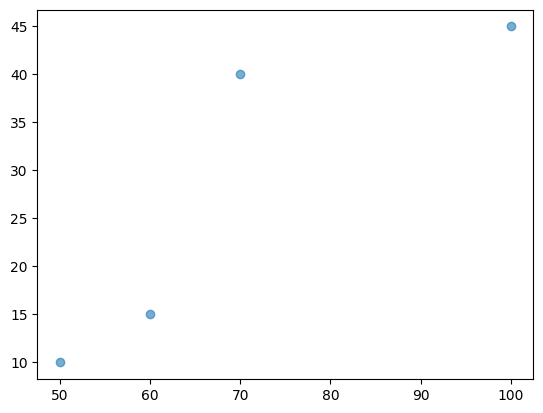

In [24]:
plt.scatter(x_hw[:,1:], y_hw[:,0], alpha=0.6)
plt.show()

In [25]:
w_hw = (
    inv(
        (x_hw.T).dot(x_hw)
    )
    .dot(x_hw.T)
    .dot(y_hw)
)
w_hw

array([[-22.5       ],
       [  0.71428571]])

### y = 0.71428571x-22.5 

In [26]:
margin = 10
x_hw_min = x_hw[:,1:].min() - margin
x_hw_max = x_hw[:,1:].max() + margin

In [27]:
x_hw_max, x_hw_min

(110, 40)

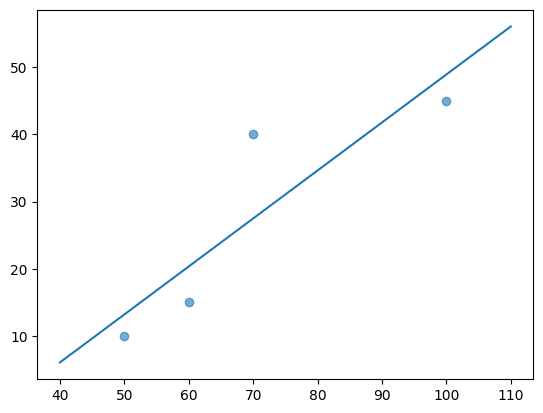

In [28]:
plt.scatter(x_hw[:,1:], y_hw[:,0], alpha=0.6)
plt.plot([x_hw_min, x_hw_max], [0.71428571*x_hw_min-22.5, 0.71428571*x_hw_max-22.5])
plt.show()

## Метрики

In [29]:
features = np.array(df[df.columns[:-1]])
y = np.array(df["MEDV"])

In [30]:
reg = LinearRegression().fit(features, y)

In [31]:
y_true = y
y_predict = reg.predict(features)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [33]:
print(f"MAE: {mean_absolute_error(y_true, y_predict):.2f}")

MAE: 3.27


In [34]:
print(f"MSE: {mean_squared_error(y_true, y_predict):.2f}")

MSE: 21.89


In [35]:
print(f"RMSE: {root_mean_squared_error(y_true, y_predict):.2f}")

RMSE: 4.68


In [36]:
print(f"R^2: {r2_score(y_true, y_predict):.2f}") # нормальзована r^2=1 - max, модель отлично обучена

R^2: 0.74


## Трансформации входных данных для линейной регрессии

### Логарифмирование

In [37]:
x = np.linspace(1, 10, num=10).reshape(-1, 1)
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [38]:
y = [1.5, 2.5, 3, 4.5, 12, 6.7, 7, 8.5, 14, 7]

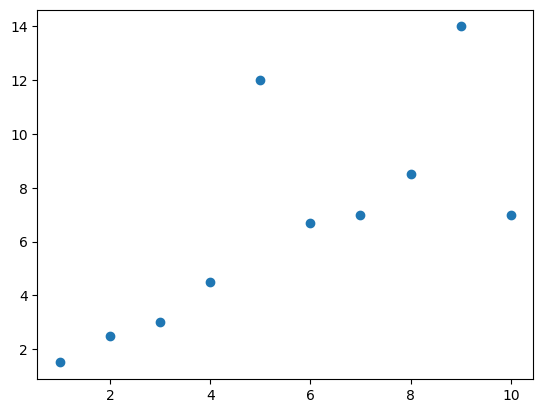

In [39]:
plt.scatter(x, y)
plt.show()

In [41]:
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
print(f"r2_score: {r2_score(y, y_pred):.3f}")

r2_score: 0.522


In [42]:
y_transformed = np.log(y)
y_transformed

array([0.40546511, 0.91629073, 1.09861229, 1.5040774 , 2.48490665,
       1.90210753, 1.94591015, 2.14006616, 2.63905733, 1.94591015])

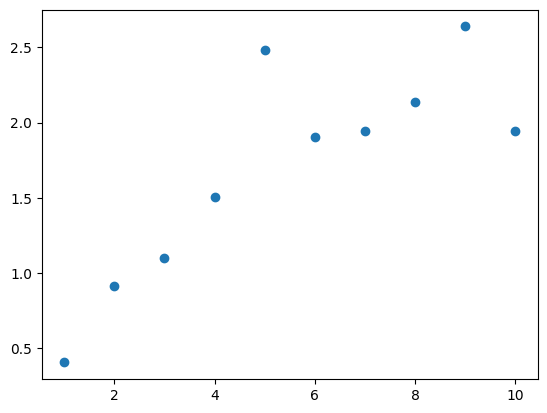

In [43]:
plt.scatter(x, y_transformed)
plt.show()

In [45]:
reg = LinearRegression().fit(x, y_transformed)
y_pred = reg.predict(x)
print(f"r2_score: {r2_score(y_transformed, y_pred):.3f}")

r2_score: 0.678


#### Метрика R<sup>2</sup> score увеличилась, а значит логарифмирование работает

### Извлечение квадратного корня

In [46]:
x = np.linspace(1, 10, num=10).reshape(-1, 1)
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [47]:
y = [1.5, 2.5, 3, 4.5, 12, 6.7, 7, 8.5, 14, 7]

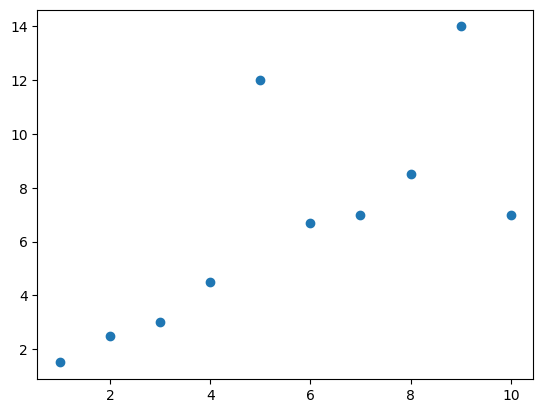

In [48]:
plt.scatter(x, y)
plt.show()

In [49]:
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
print(f"r2_score: {r2_score(y, y_pred):.3f}")

r2_score: 0.522


In [50]:
y_transformed = np.sqrt(y)
y_transformed

array([1.22474487, 1.58113883, 1.73205081, 2.12132034, 3.46410162,
       2.58843582, 2.64575131, 2.91547595, 3.74165739, 2.64575131])

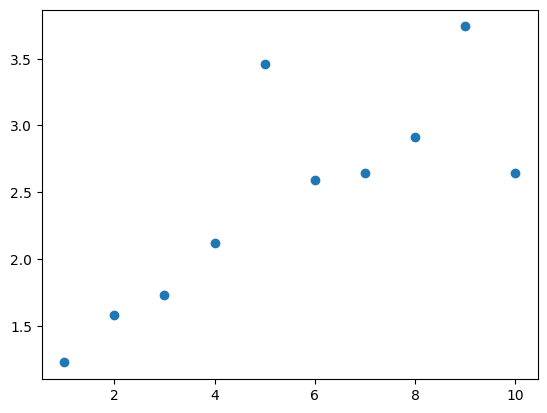

In [51]:
plt.scatter(x, y_transformed)
plt.show()

In [52]:
reg = LinearRegression().fit(x, y_transformed)
y_pred = reg.predict(x)
print(f"r2_score: {r2_score(y_transformed, y_pred):.3f}")

r2_score: 0.614


#### Метрика R<sup>2</sup> score увеличилась, а значит извлечение корня работает

### Z-score

z = (X – μ) / σ

where:

    X is a single raw data value
    μ is the population mean (.mean())
    σ is the population standard deviation (.std())


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
raw_data = np.array([1., 3., 2., 4., 2., 10., 2., 5., 2., 2., 1., 7., 5., 2., 5., 6., 10., 3., 24.], dtype=np.float32)
print(f"Сырой датасет: {raw_data[:6]}")

Сырой датасет: [ 1.  3.  2.  4.  2. 10.]


In [58]:
transformed_data = StandardScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print(f"z-transformed датасет: {transformed_data[:6]}")

z-transformed датасет: [-0.7814943  -0.3958218  -0.5886581  -0.20298555 -0.5886581   0.9540321 ]


### min-max noramalization
Переносит все точки на отрезок [0, 1] <br>
$ X_{scaled}=\frac{X-X_{min}}{X_{max}-X_{min}} $

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
raw_data = np.array([1., 3., 2., 4., 2., 10., 2., 5., 2., 2., 1., 7., 5., 2., 5., 6., 10., 3., 24.], dtype=np.float32)
print(f"Сырой датасет: {raw_data[:6]}")

Сырой датасет: [ 1.  3.  2.  4.  2. 10.]


In [63]:
transformed_data = MinMaxScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print(f"min-max scaled датасет: {transformed_data[:6]}")
print(f"Min: {transformed_data.min()}, Max: {transformed_data.max()}")

min-max scaled датасет: [0.         0.08695652 0.04347826 0.13043478 0.04347826 0.39130437]
Min: 0.0, Max: 1.0


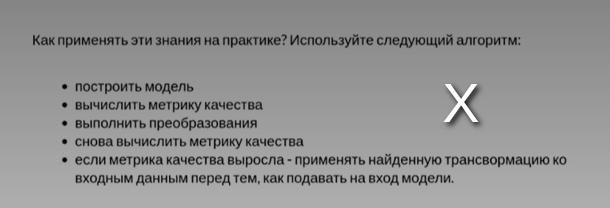

## Полиномиальная регрессия

### y=x

In [65]:
x = np.linspace(-10, 10, num=100)
y = x

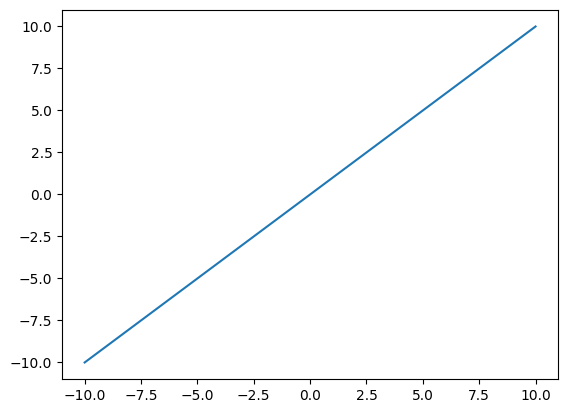

In [67]:
plt.plot(x, y)
plt.show()

### $y=x^2$

In [68]:
y = x**2

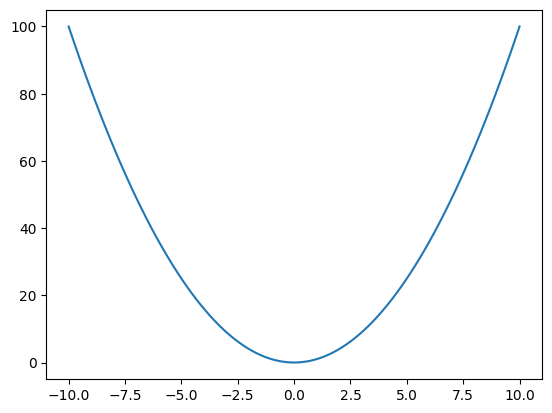

In [69]:
plt.plot(x, y)
plt.show()

### $y=x^3$

In [70]:
y = x**3

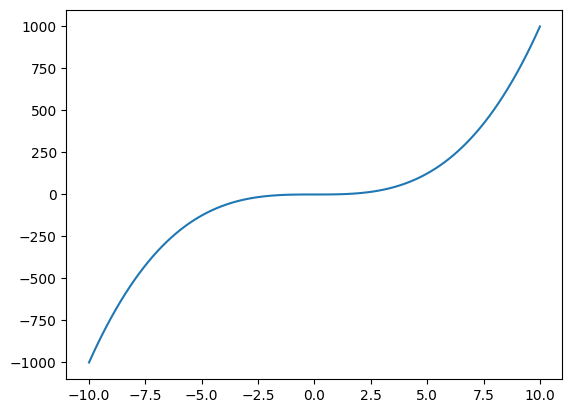

In [71]:
plt.plot(x, y)
plt.show()

### $y=0.5x^3+2.5x^2+0.1x$

In [72]:
y = 0.5*x**3 + 2.5*x**2 + 0.1*x

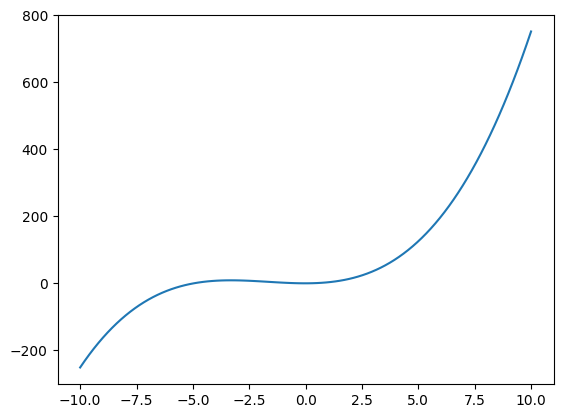

In [73]:
plt.plot(x, y)
plt.show()

### Демо

In [87]:
df = pd.read_csv("3.10_non_linear.csv")
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


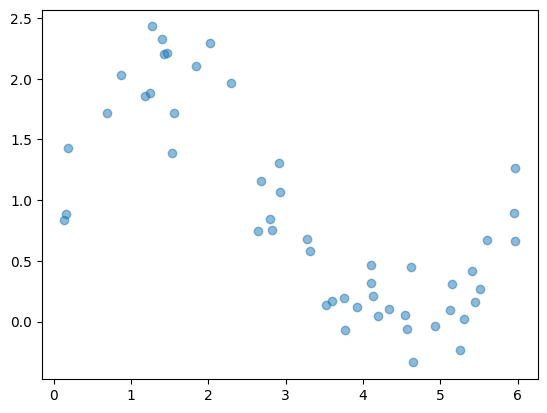

In [76]:
margin = 0.3
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.show()

In [93]:
reg = LinearRegression().fit(df[["x_train"]], df.y_train)
y_p = reg.predict(df[["x_train"]])

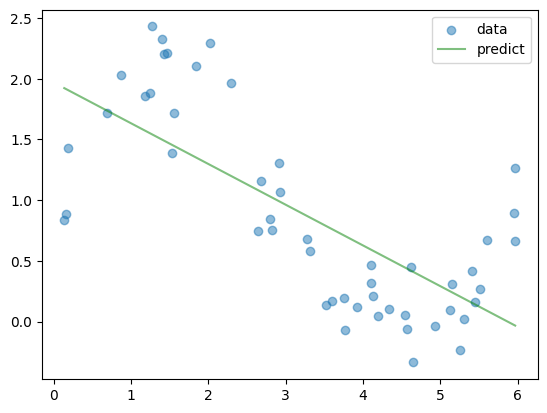

In [83]:
margin = 0.3
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.plot(df.x_train, y_p, color="g", alpha=0.5)
plt.legend(("data", "predict"))
plt.show()

In [100]:
def generate_degrees_df(df, column, n):
    df_copy = df.copy()
    for i in range(2, n+1):
        df_copy[f"{column}_{i}"] = df_copy[column]**i
    return df_copy

def generate_degrees_np(source_data: list, n: int):
    return np.array([
        source_data**i for i in range(1, n+1)
    ]).T

In [98]:
df_copy = generate_degrees_df(df, "x_train", 3)
df_copy.head()

,x_train,y_train,x_train_2,x_train_3
0,0.138368,0.838812,0.019146,0.002649
1,0.157237,0.889313,0.024723,0.003887
2,0.188684,1.430040,0.035602,0.006717
3,0.685553,1.717309,0.469983,0.322198
4,0.874237,2.032588,0.764290,0.668171


In [101]:
new_data = generate_degrees_np(df.x_train, 3)
new_data

array([[1.38368445e-01, 1.91458266e-02, 2.64917826e-03],
       [1.57236870e-01, 2.47234331e-02, 3.88743523e-03],
       [1.88684243e-01, 3.56017437e-02, 6.71748808e-03],
       [6.85552751e-01, 4.69982575e-01, 3.22197847e-01],
       [8.74236995e-01, 7.64290323e-01, 6.68170875e-01],
       [1.18242126e+00, 1.39812003e+00, 1.65316685e+00],
       [1.25160548e+00, 1.56651628e+00, 1.96066037e+00],
       [1.27047391e+00, 1.61410395e+00, 2.05067694e+00],
       [1.40255288e+00, 1.96715457e+00, 2.75903830e+00],
       [1.42771078e+00, 2.03835806e+00, 2.91018576e+00],
       [1.47173710e+00, 2.16601009e+00, 3.18779740e+00],
       [1.53463185e+00, 2.35509491e+00, 3.61420364e+00],
       [1.55350027e+00, 2.41336309e+00, 3.74916022e+00],
       [1.84281611e+00, 3.39597122e+00, 6.25815048e+00],
       [2.01892141e+00, 4.07604364e+00, 8.22921175e+00],
       [2.28936882e+00, 5.24120960e+00, 1.19990618e+01],
       [2.64157941e+00, 6.97794177e+00, 1.84327873e+01],
       [2.68560573e+00, 7.21247

In [102]:
reg = LinearRegression().fit(new_data, df.y_train)
y_p = reg.predict(new_data)

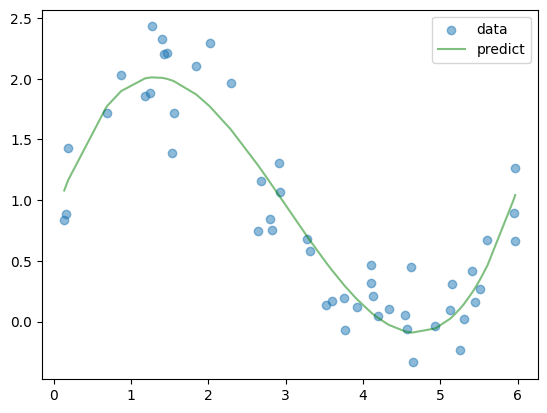

In [103]:
margin = 0.3
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.plot(df.x_train, y_p, color="g", alpha=0.5)
plt.legend(("data", "predict"))
plt.show()

Степень полинома: 1. Ошибка: 0.307
Степень полинома: 2. Ошибка: 0.298
Степень полинома: 3. Ошибка: 0.071
Степень полинома: 4. Ошибка: 0.067
Степень полинома: 5. Ошибка: 0.067
Степень полинома: 6. Ошибка: 0.064
Степень полинома: 7. Ошибка: 0.064
Степень полинома: 8. Ошибка: 0.058
Степень полинома: 9. Ошибка: 0.058
Степень полинома: 10. Ошибка: 0.058
Степень полинома: 11. Ошибка: 0.058
Степень полинома: 12. Ошибка: 0.057
Степень полинома: 13. Ошибка: 0.055
Степень полинома: 14. Ошибка: 0.053
Степень полинома: 15. Ошибка: 0.054
Степень полинома: 16. Ошибка: 0.056
Степень полинома: 17. Ошибка: 0.058
Степень полинома: 18. Ошибка: 0.057
Степень полинома: 19. Ошибка: 0.063
Степень полинома: 20. Ошибка: 0.067
Степень полинома: 21. Ошибка: 0.076
Степень полинома: 22. Ошибка: 0.106
Степень полинома: 23. Ошибка: 0.106
Степень полинома: 24. Ошибка: 0.106
Степень полинома: 25. Ошибка: 0.106


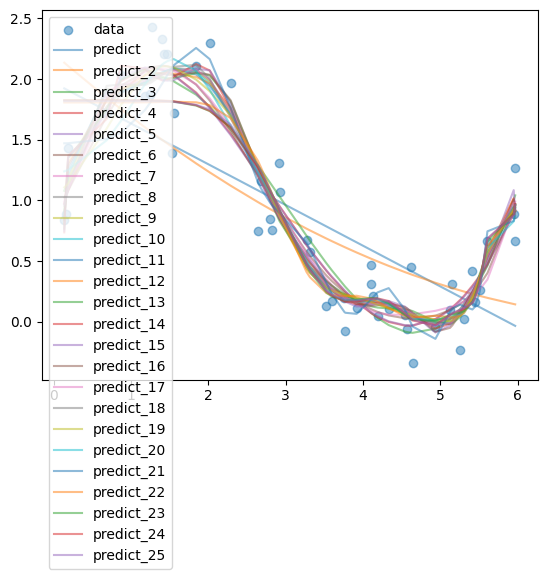

In [112]:
n = 25
reg = LinearRegression().fit(df[["x_train"]], df.y_train)
y_p = reg.predict(df[["x_train"]])
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.plot(df.x_train, y_p, alpha=0.5)
print(f"Степень полинома: 1. Ошибка: {mean_squared_error(df.y_train, y_p):.3f}")
for i in range(2, n+1):
    new_data = generate_degrees_np(df.x_train, i)
    reg = LinearRegression().fit(new_data, df.y_train)
    y_p = reg.predict(new_data)
    plt.plot(df.x_train, y_p, alpha=0.5)
    print(f"Степень полинома: {i}. Ошибка: {mean_squared_error(df.y_train, y_p):.3f}")
legend = ["data", "predict"]
legend_other = [f"predict_{i}" for i in range(2, n+1)]
legend.extend(legend_other)
plt.legend(legend)
plt.show()